### Heart disease classification using ML

In [4]:
!pip install numpy


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\linga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install numpy pandas matplotlib seaborn scikit-learn pickle-mixin


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\linga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip show numpy pandas matplotlib seaborn scikit-learn pickle-mixin


Name: numpy
Version: 2.2.4
Summary: Fundamental package for array computing in Python
Home-page: 
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
         All rights reserved.
         
         Redistribution and use in source and binary forms, with or without
         modification, are permitted provided that the following conditions are
         met:
         
             * Redistributions of source code must retain the above copyright
                notice, this list of conditions and the following disclaimer.
         
             * Redistributions in binary form must reproduce the above
                copyright notice, this list of conditions and the following
                disclaimer in the documentation and/or other materials provided
                with the distribution.
         
             * Neither the name of the NumPy Developers nor the names of any
                contributors may be used to endorse or promote

In [7]:
!pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: C:\Users\linga\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Reading the data

In [9]:
df=pd.read_csv("heart.csv")

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### Data contains

age: The age of the patient in years.

sex: The gender of the patient (1 = Male, 0 = Female).

cp : (Chest Pain Type):

trestbps : (Resting Blood Pressure): The patient’s blood pressure (in mm Hg) at rest.

chol : (Serum Cholesterol): The cholesterol level in mg/dL.

fbs : (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dL (1 = True, 0 = False).

restecg : (Resting Electrocardiographic Results):

thalach : (Maximum Heart Rate Achieved): The maximum heart rate during exercise.

exang : (Exercise-Induced Angina): Angina induced by exercise (1 = Yes, 0 = No).

oldpeak: ST depression induced by exercise compared to rest (indicating heart stress).

slope: Slope of the peak exercise ST segment:

ca (Number of Major Vessels): Number of major vessels (0-3) colored by fluoroscopy.

thal: A blood disorder called thalassemia:

target: Presence of heart disease (1 = Disease Present, 0 = No Disease).

### Data exploration

In [12]:
df.target.value_counts()
# value_counts():
# This is a pandas function that counts the number of occurrences of each unique value in a specified column

target
1    165
0    138
Name: count, dtype: int64

In [13]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\linga\AppData\Local\Temp\ipykernel_26776\23255487.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='bwr')


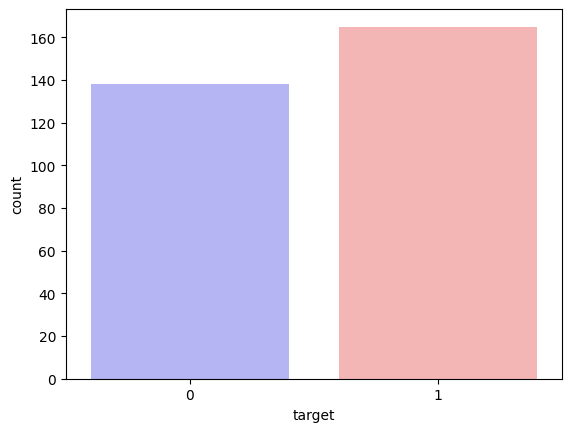

In [14]:
sns.countplot(x='target',data=df,palette='bwr')
plt.show()

In [15]:
count_no_disease = len(df[df.target == 0])
count_have_disease = len(df[df.target == 1])

print('% of patients not having Heart Disease: {:.2f}%'.format((count_no_disease / len(df.target)) * 100))
print('% of patients having Heart Disease: {:.2f}%'.format((count_have_disease / len(df.target)) * 100))


% of patients not having Heart Disease: 45.54%
% of patients having Heart Disease: 54.46%


C:\Users\linga\AppData\Local\Temp\ipykernel_26776\3241105358.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='mako_r')


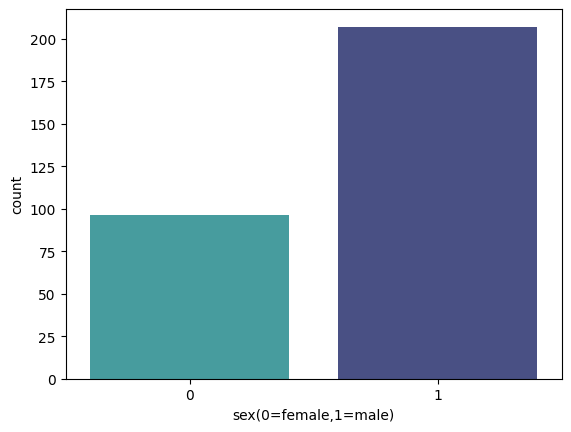

In [16]:
sns.countplot(x='sex',data=df,palette='mako_r')
plt.xlabel("sex(0=female,1=male)")
plt.show()

In [17]:
count_female=len(df[df.sex==0])
count_male=len(df[df.sex==1])
print("% of male patients {:.2f}%".format((count_male/len(df.sex))*100))
print("% of female patients {:.2f}%".format((count_female/len(df.sex))*100))

% of male patients 68.32%
% of female patients 31.68%


In [18]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212



###### crosstab(): This function creates a cross-tabulation table that shows the frequency (count) of data combinations between two columns.

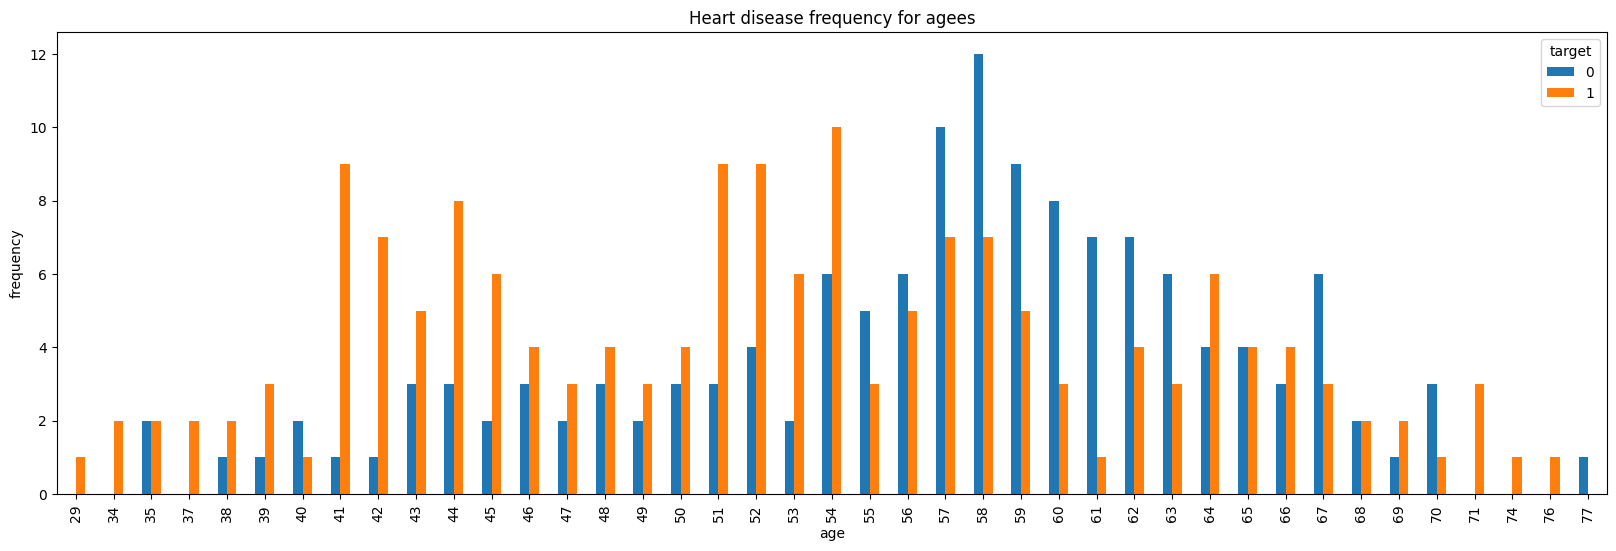

In [19]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart disease frequency for agees')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()


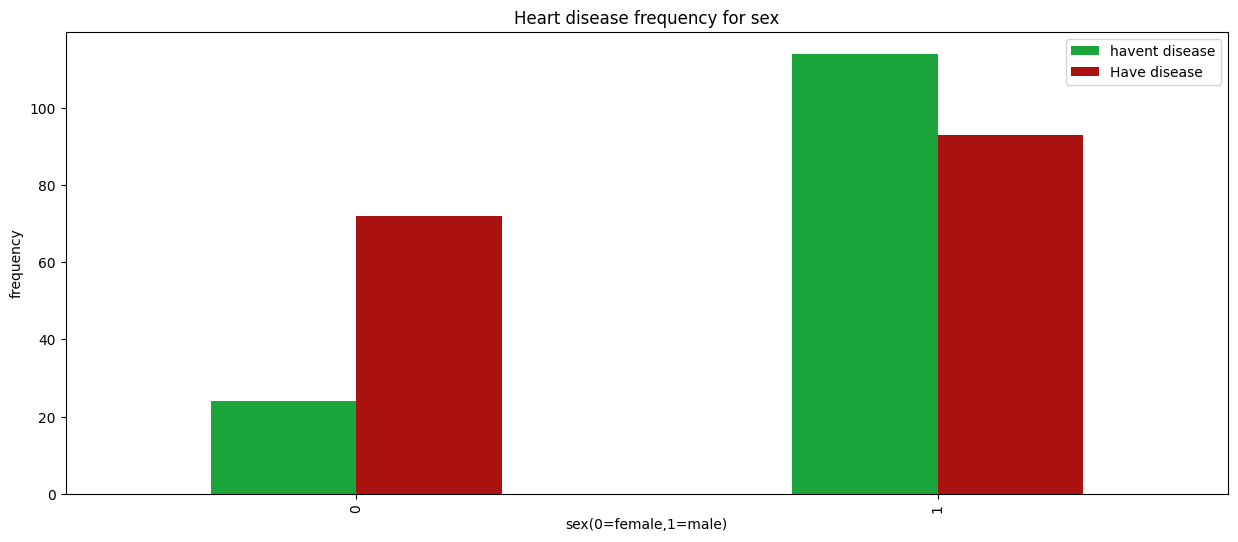

In [20]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title("Heart disease frequency for sex")
plt.xlabel("sex(0=female,1=male)")
plt.ylabel('frequency')
plt.legend(["havent disease", "Have disease"])
plt.show()

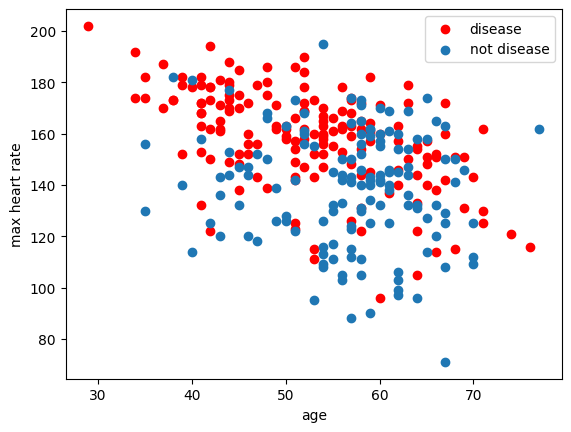

In [21]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1],c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0])
plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(["disease","not disease"])
plt.show()

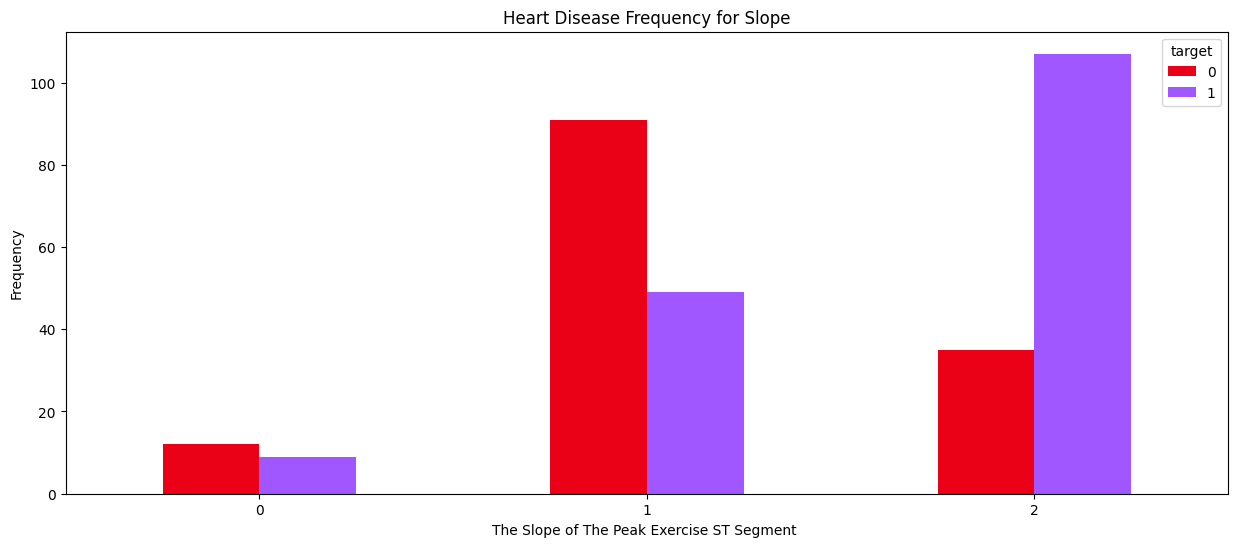

In [22]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#EA0017','#A057FF' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


###### plt.xticks():

    This function is used to control the x-axis tick marks (labels) in a plot.

    It can adjust the position, format, or rotation of the labels on the x-axis.

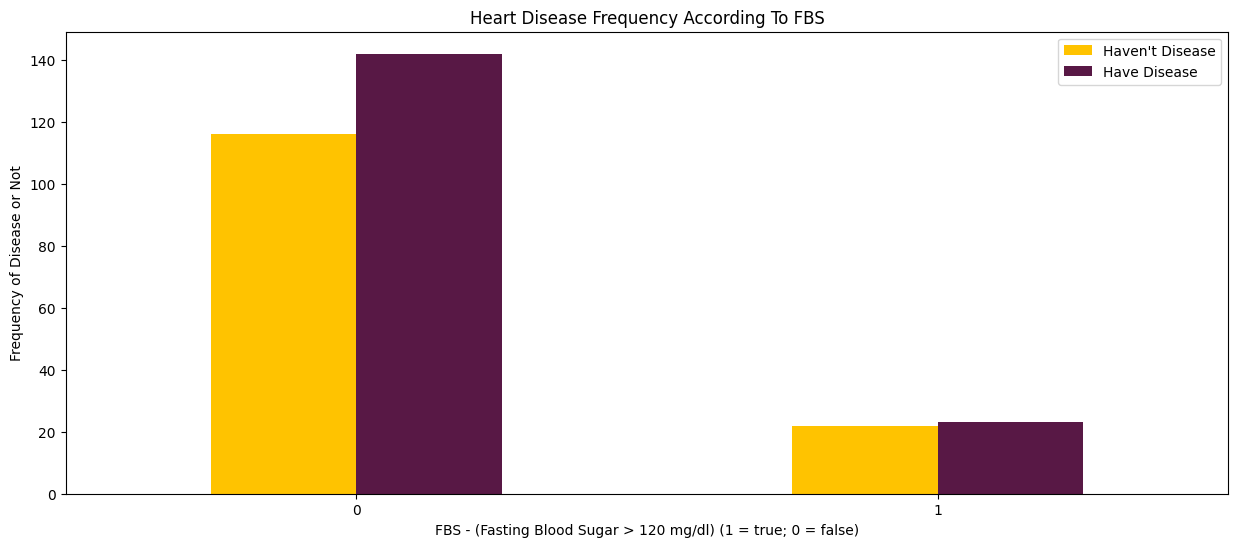

In [23]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

#### Creating Dummy Variables
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [24]:
a=pd.get_dummies(df['cp'],prefix='cp')
b=pd.get_dummies(df['thal'],prefix='thal')
c=pd.get_dummies(df['slope'],prefix='slope')

In [25]:
frames=[df,a,b,c]
df=pd.concat(frames,axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [26]:
df=df.drop(columns=['cp','thal','slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
y=df.target.values
x=df.drop(['target'],axis=1) # x_data will store all the feature columns (independent variables) except the "target"(output) column.


##### Normalizing the data
Machine learning models like Logistic Regression, KNN, and Neural Networks are sensitive to different feature scales.
Normalization ensures that features with large values (e.g., salary, height) don't dominate features with smaller values (e.g., age, exam scores).
It helps algorithms converge faster during training and improves performance.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

C:\Users\linga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred=lr.predict(x_test)

In [32]:
acc=accuracy_score(y_test,y_pred)*100
accuracies = {}

accuracies['Logistic Regression'] = acc
print(f"Accuracy using accuracy_score: {acc:.2f}%")


Accuracy using accuracy_score: 90.16%


###### Use model.score() if you want a quick and simple accuracy check.
###### Use accuracy_score() if you need more control or want to compare different models.

# K-Nearest Neighbour


In [33]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [34]:
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test,y_test)*100))

2 NN Score: 63.93%


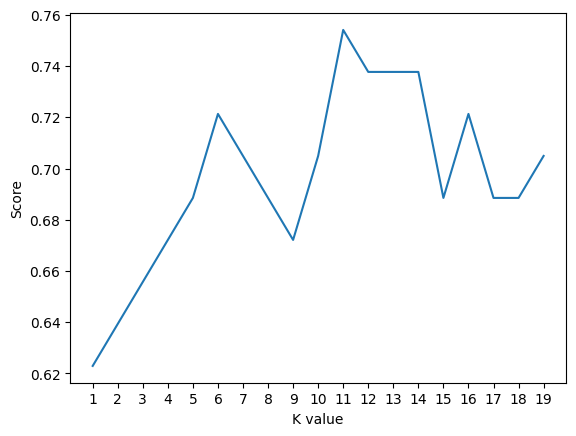

Maximum KNN Score is 75.41%


In [35]:
# finding the best k-value4

scorelist=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train,y_train)
    scorelist.append(knn2.score(x_test,y_test))


plt.plot(range(1,20), scorelist)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scorelist)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)

SVC(random_state=1)

In [38]:
y_pred=svm.predict(x_test)

In [39]:
acc = accuracy_score(y_test, y_pred)*100
accuracies['SVM'] = acc
print("SVM Accuracy: {:.2f}%".format(acc))

SVM Accuracy: 70.49%


# Naive Bayes Algorithm

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [41]:
nb.fit(x_train, y_train)

GaussianNB()

In [42]:
y_pred=nb.predict(x_test)

In [43]:
acc=accuracy_score(y_test,y_pred)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 77.05%


# Decision Tree Algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [45]:
y_pred=dtc.predict(x_test)
acc=accuracy_score(y_test,y_pred)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 83.61%


# Random Forest Classification 

In [46]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


In [47]:
print(accuracies)


{'Logistic Regression': 90.1639344262295, 'KNN': 75.40983606557377, 'SVM': 70.49180327868852, 'Naive Bayes': 77.04918032786885, 'Decision Tree': 83.60655737704919, 'Random Forest': 88.52459016393442}


# comaparing the models

C:\Users\linga\AppData\Local\Temp\ipykernel_26776\3492932264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)


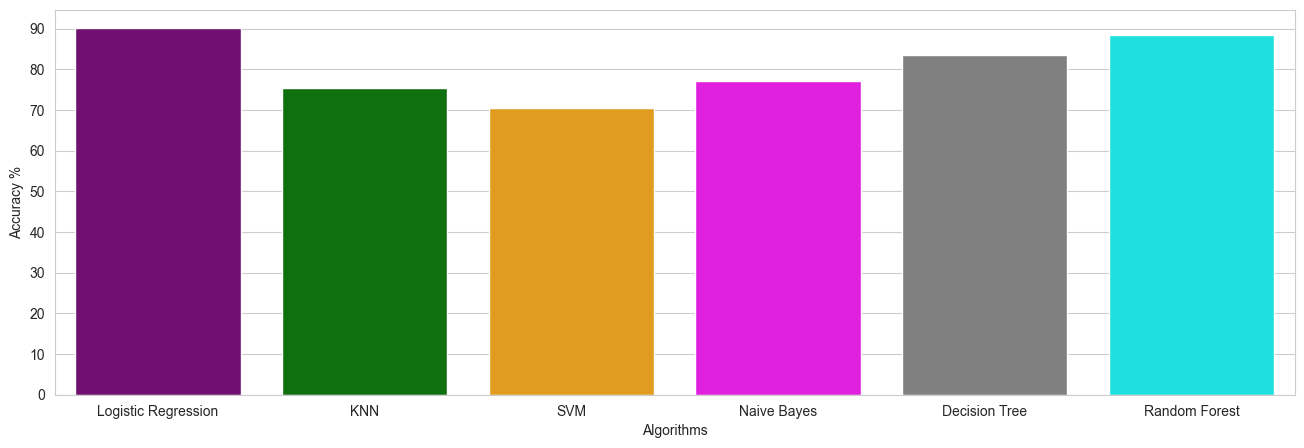

In [48]:
colors = ["purple", "green", "orange", "magenta","grey","cyan",]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

### confusion matrix
The main purpose of a confusion matrix is to evaluate the performance of a classification model by
showing the number of correct and incorrect predictions, specifically identifying True Positives (TP), 
True Negatives (TN), False Positives (FP), and False Negatives (FN).

In [49]:
# Predicted values
y_head_lr = lr.predict(x_test)

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)

y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)

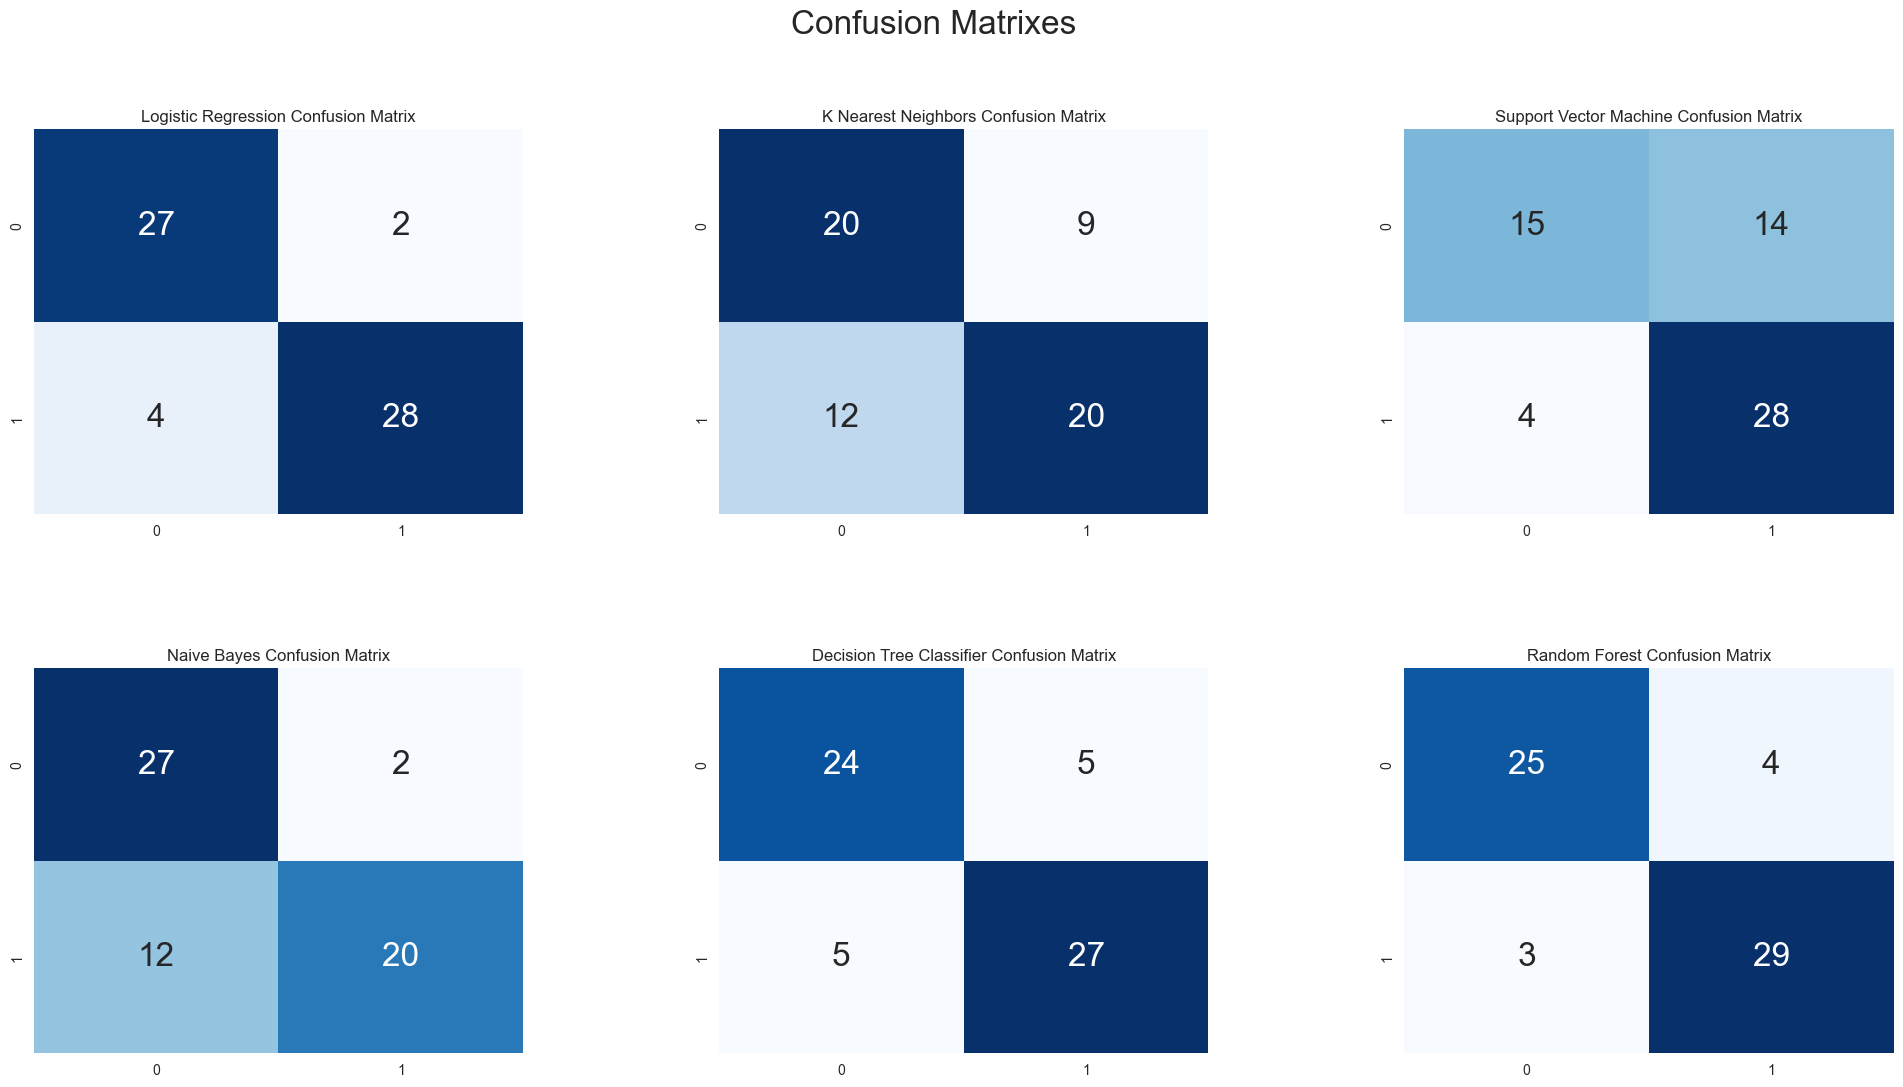

In [51]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [55]:
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [57]:
x.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [54]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train are available
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Save with the current version
with open("rf.pkl", "wb") as f:
    pickle.dump(model, f)
